(512, 21)


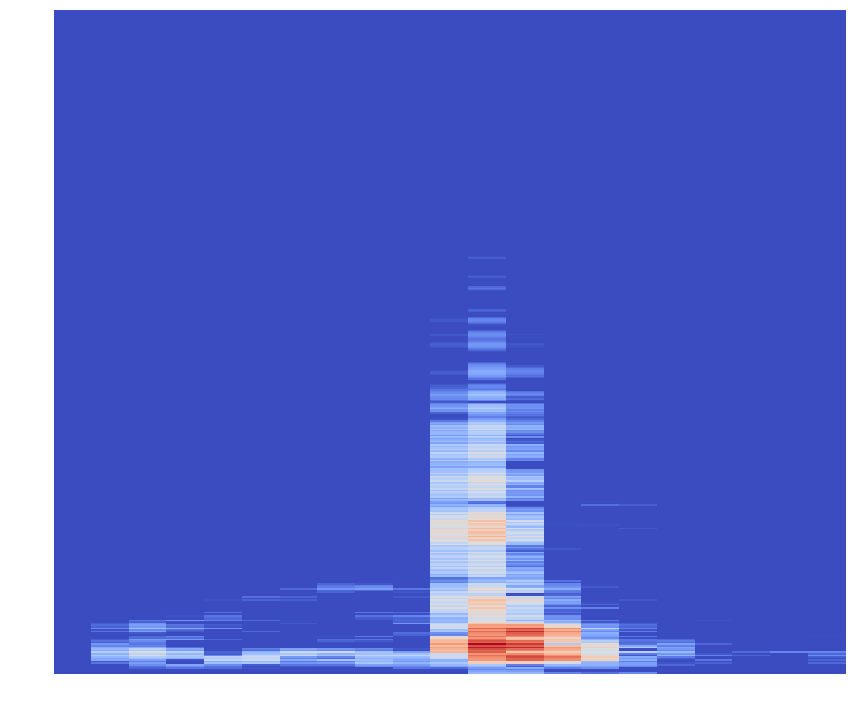

In [65]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
from tqdm import tqdm

%matplotlib inline

y, sr = librosa.load("50.ogg")

S = librosa.feature.melspectrogram(y, sr=sr, n_mels=512)
print(S.shape)
log_S = librosa.amplitude_to_db(S)

plt.figure(figsize=(12,10))

librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

#plt.title('mel power spectrogram')
#plt.colorbar(format='%+02.0f dB')
plt.axis('off')
plt.tight_layout()
plt.savefig('Spectrogram_mask.jpg',)

In [86]:
def griffinlim(spectrogram, n_iter = 100, window = 'hann', n_fft = 1024, hop_length = -1, verbose = False):
    if hop_length == -1:
        hop_length = n_fft // 4
    angles = np.exp(2j * np.pi * np.random.rand(*spectrogram.shape))
    t = tqdm(range(n_iter), ncols=100, mininterval=2.0, disable=not verbose)
    for i in t:
        print(i)
        print(angles.shape)
        print(spectrogram.shape)
        print(np.abs(spectrogram).astype(np.complex).shape)
        full = np.abs(spectrogram).astype(np.complex) * angles
        inverse = librosa.istft(full, hop_length = hop_length, window = window)
        rebuilt = librosa.stft(inverse, n_fft = n_fft, hop_length = hop_length, window = window)
        angles = np.exp(1j * np.angle(rebuilt))

        if verbose:
            diff = np.abs(spectrogram) - np.abs(rebuilt)
            t.set_postfix(loss=np.linalg.norm(diff, 'fro'))

    full = np.abs(spectrogram).astype(np.complex) * angles
    inverse = librosa.istft(full, hop_length = hop_length, window = window)

    return inverse

In [87]:
griffinlim(log_S)

0
(512, 21)
(512, 21)
(512, 21)
1
(513, 21)
(512, 21)
(512, 21)


ValueError: operands could not be broadcast together with shapes (512,21) (513,21) 